# CS217 : Assignment 1

---
Please edit the cell below to include your name and student ID #

**name:**

**SID:**

# Jupyter Notebook Tutorials 

We will make extensive use of Python's numerical arrays (NumPy) and interactive plotting (Matplotlib) 
in Jupyter notebooks for the course assignments. This first assignment is intended as a gentle warm 
up in case you haven't used these tools before. Start by reading through the following tutorials:

https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#starting-the-notebook-server
https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb
https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Running%20Code.ipynb


This page gives a good introduction to NumPy and many examples of using NumPy along with Matplotlib:

http://www.scipy-lectures.org/intro/numpy/numpy.html

You should also get comfortable with searching through the documentation as needed

https://docs.scipy.org/doc/numpy-1.13.0/reference/index.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html


# 1. Thin lense approximation

Derive the thin lens equation we discussed in class in a geometric way using only the constraints that (1) rays entering parallel to the lense converge on the focal point (2) the lens is symmetric as shown in the diagram below.   

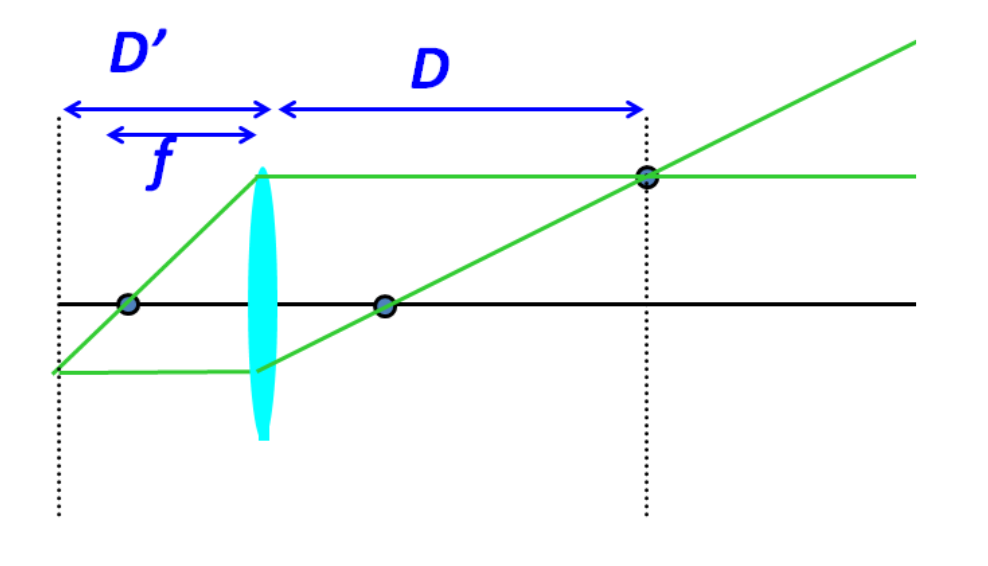

Prove that $\frac{1}{D} + \frac{1}{D'} = \frac{1}{f}$. You will likely want to draw your own diagram and introduce some additional variables in order to make your argument. Please add additional images and equations to the cell below as needed to support your argument.

Your answer goes here:



# 2. Cameras & Triangulation


***
### 2.1 Field of View 
Suppose your camera has an image sensor that is 640x480 pixels, a physical resolution of 10pixels/mm and a focal length of f=50mm. What is the horizontal field of view (in degrees)? What is the vertical field of view? Suppose you adjust the zoom on the camera, changing the focal length to 100mm. What is the new horizontal field of view?

***
### 2.2  Camera motions
Your camera starts out at the origin of the world coordinate system. You rotate it to the left about the y-axis by 45 degrees and then translate it right by 1 meter. Describe this motion of the camera concisely in terms of rotation matrices and translation vectors. Suppose there is a point with coordinates (1,1,1) meters in the world coordinate system. What will its coordinates be relative to the standard camera coordinate system after the camera has been moved?

### 2.3 Estimate the extrinsic parameters for your eyes

Work relative to a world coordinate system centered on the bridge of your nose with the z-axis pointed out of your face and x-axis to the right. Since eyes rotate in their sockets depending on how far away you focus (this phenomenon is called vergence) assume you are looking at a computer monitor that is 40 cm away from your face. 

You may find it interesting to find some red/blue glasses and modify the projection code to render anaglyphs of various 3D shapes overlaying the left and right eye views in red and blue.

### 2.4 Triangulation

Write a function called **triangulate** that takes the coordinates of points in two images along with the camera parameters and returns the 3D coordinates of the points in world coordinates.  We discussed a couple different approaches to trianguation in class.  You are welcome to use whichever you prefer.  The provided functions **project** and **test_triangulation** outline a reasonable way to represent the camera parameters and should be useful in experimenting with your code.

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
class Camera:
    """
    A simple data structure describing camera parameters 
    
    The parameters describing the camera
    cam.f : float   --- camera focal length (in units of pixels)
    cam.c : 2x1 vector  --- offset of principle point
    cam.R : 3x3 matrix --- camera rotation
    cam.t : 3x1 vector --- camera translation 

    
    """    
    def __init__(self,f,c,R,t):
        self.f = f
        self.c = c
        self.R = R
        self.t = t

        
    def project(self,pts3):
        """
        Project the given 3D points in world coordinates into the specified camera    

        Parameters
        ----------
        pts : 2D numpy.array (dtype=float)
            Coordinates of N points stored in a array of shape (3,N)

        Returns
        -------
        ipts : 2D numpy.array (dtype=float)
            Image coordinates of N points stored in a array of shape (N,2)

        """

        assert(pts3.shape[0]==3)

        # get point location relative to camera
        pcam = self.R.transpose() @ (pts3 - self.t)
         
        # project
        p = self.f * (pcam / pcam[2,:])
        
        # offset principal point
        pts2 = p[0:2,:] + self.c
        
        assert(pts2.shape[1]==pts3.shape[1])
        assert(pts2.shape[0]==2)
    
        return pts2
    

In [ ]:
def triangulate(pts2L,camL,pts2R,camR):
    """
    Triangulate the set of points seen at location pts2L / pts2R in the
    corresponding pair of cameras. Return the 3D coordinates relative
    to this global coordinate system


    Parameters
    ----------
    pts2L : 2D numpy.array (dtype=float)
        Coordinates of N points stored in a array of shape (N,2) seen from camL camera

    pts2R : 2D numpy.array (dtype=float)
        Coordinates of N points stored in a array of shape (N,2) seen from camR camera

    camL : Camera
        The first "left" camera view

    camR : Camera
        The second "right" camera view

    Returns
    -------
    pts3 : 2D numpy.array (dtype=float)
        array containing 3D coordinates of the points in global coordinates

    """

    #
    #  your code goes here
    #
    #


    return pts3

In [ ]:
def generate_hemisphere(radius,center,npts):
    """
    Generate a set of 3D points which are randomly distributed on the
    surface of a hemisphere
    
    
    Parameters
    ----------
    radius : float
        Hemisphere radius

    center : numpy.array (dtype=float)
        3x1 vector specifying the center of the hemisphere
        
    npts : int
        number of points to generate

    Returns
    -------
    x : 2D numpy.array (dtype=float)
        3xnpts array containing coordinates of the points
        
    """
    
    assert(center.shape==(3,1))
    
    
    #generate randomly distributed points
    x = np.random.standard_normal((3,npts))
    
    #scale points to the surface of a sphere with given radius
    nx = np.sqrt(np.sum(x*x,axis=0))
    x = radius * x / nx
    
    # make points with positive z-coordinates negative
    # so that points are all on a half-sphere 
    x[2,:] = -np.abs(x[2,:])
    
    # translate to desired position
    x = x + center
    
    return x


# demo the generate_hemisphere function
if False:
    x = generate_hemisphere(1,np.array([[0,0,0],]).T,2000)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(x[0,:],x[1,:],x[2,:],'.')
    ax.axis('square')
    ax.set_zlim(-1,1)

In [ ]:
#
# test your camera and triangulate function
#


# create a rotation matrix representing rotation around y-axis by amount theta
def roty(theta):
    st = np.sin(theta)
    ct = np.cos(theta)
    R = np.array([[ct,0,st],[0,1,0],[-st,0,ct]])
    return R


#compute rotation angle so that the camera is looking directly at the sphere

b = 5  #baseline between cameras
d = 10   #distance to object
theta = np.arctan(b/d)  
tL = np.array([[-b,0,0]]).T
tR = np.array([[b,0,0]]).T
camL = Camera(f=100,c=np.array([[50,50]]).T,t=tL,R=roty(theta))
camR = Camera(f=100,c=np.array([[50,50]]).T,t=tR,R=roty(-theta))

#generate 3D points
pts3 = generate_hemisphere(2,np.array([[0,0,d]]).T,500)

#project into each camera
pts2L = camL.project(pts3)
pts2R = camR.project(pts3)

#triangulate to recover 3d position
pts3t = triangulate(pts2L,camL,pts2R,camR)



#
# visualize results
#

# generate coordinates of a line segment running from the center
# of the camera to 3 units in front of the camera
lookL = np.hstack((tL,tL+camL.R @ np.array([[0,0,3]]).T))
lookR = np.hstack((tR,tR+camR.R @ np.array([[0,0,3]]).T))

# visualize the left and right image overlaid
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax.plot(pts2L[0,:],pts2L[1,:],'b.')
ax.plot(pts2R[0,:],pts2R[1,:],'r.')
plt.axis('equal')

#visualize 3D layout of points, camera positions
# and the direction the camera is pointing
ax = fig.add_subplot(2,2,2,projection='3d')
ax.plot(pts3[0,:],pts3[1,:],pts3[2,:],'.')
ax.plot(tR[0],tR[1],tR[2],'ro')
ax.plot(tL[0],tL[1],tL[2],'bo')
ax.plot(lookL[0,:],lookL[1,:],lookL[2,:],'b')
ax.plot(lookR[0,:],lookR[1,:],lookR[2,:],'r')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

# overhead view showing points, camera
# positions, and direction camera is pointed
ax = fig.add_subplot(2,2,3)
ax.plot(pts3[0,:],pts3[2,:],'.')
ax.plot(tL[0],tL[2],'bo')
ax.plot(lookL[0,:],lookL[2,:],'b')
ax.plot(tR[0],tR[2],'ro')
ax.plot(lookR[0,:],lookR[2,:],'r')
plt.axis('equal')
plt.grid()
plt.xlabel('x')
plt.ylabel('z')

# compare reconstruction
ax = fig.add_subplot(2,2,4,projection='3d')
ax.plot(pts3[0,:],pts3[1,:],pts3[2,:],'b.')
ax.plot(pts3t[0,:],pts3t[1,:],pts3t[2,:],'ro',fillstyle='none')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')



### 2.5 How sensitive is the 3D reconstruction to errors in the 2D point locations? 

You can approach this question empirically by generating a pair of test images and then adding random Gaussian noise to the 2D point locations. Plot out the error in the 3D recovery as a function of the noise in the 2D point locations for several different levels of noise. You can measure error as the sum of squared distances between the true locations and the recovered noisy locations.  Insert additional cells as needed below in order to carry out your experiments and describe your result.

### 2.6 How sensitive is the 3D reconstruction procedure to errors in the camera parameters? 

Compute reconstructionsof the hemisphere where you vary (a) the image center (+/-10 pixels), (b) the focal length (+/-10 pixels), (c) the translation vector (+/-100mm), and (d) the rotation angle (+/-5 degrees). Vary each parameter of one of the cameras passed into triangulate while keeping the other camera and the images (xL,xR) fixed. Report in a plot or table, the reconstruction error as a function of these different parameters. What parameter is the reconstruction result quality most dependent on? Discuss how you might frame this question in a more general way that doesn’t depend on the units used to measure the camera parameters.  Insert additional cells as needed below in order to carry out your experiments and describe your result.

# 3. Camera Calibration

Write a function **calibrate** that takes the coordinates of points in an image and in 3D and resturns estimated camera parameters.  Your function should first use the linear technique to estimate the camera matrix and then decompose the matrix into intrinsic and extrinsic components using RQ matrix decomposition. Your function should output the same data structure used previously to represent a camera.

In [ ]:
def calibrate(pts2,pts3):
    """
    Give a set of 3D points and their correpsonding 2D image
    coordinates, estimate the parameters of the camera.

    Parameters
    ----------
    pts2 : 2D numpy.array (dtype=float)
        Coordinates of N points stored in a array of shape (N,2) seen from camL camera
        
    pts3 : 2D numpy.array (dtype=float)
        array containing 3D coordinates of the points relative to this camera's origin

    Returns
    -------
     cam : Camera
        The estimated camera parameters

    """
    
    
    

### 3.1 Synthetic calibration test

Test your method on a synthetic dataset using the cameras and points from the previous problem on triangulation. Attempt to recover camL and camR and compare your recovered values to the true parameters used to synthesize the test image. If you add Gaussian noise to the 2D point locations (but no the 3D locations) which camera parameter(s) are most affected?  Which are most stable? Please justify your answer with some simple experiment.

### 3.2 Planar calibration test

Test your calibration method on one of the calibration images provided on the course website. The corner points of the checkerboard have physical coordinates given by a grid with 8 vertices along one axis and 6 along the other axis with a spacing of 2.8cm.

What intrinsic camera parameters do you recover? Are the camera pixels square? What ambiguities arise from calibrating using a single image of a planar calibration object? To answer this question you may need to consult one of the recommended textbooks for the class or other online resources.


### 3.3 Geometric recovery challenge

In the course files, you will find a pair of images of an object with unknown geometry taken with the same camera as the calibration images. Your goal is to estimate the dimensions of the imaged box.

1. You will want to get a good estimate of the intrinsic camera parameters.  Since our simple **calibrate** function doesn't work well for planar objects, I recommend using an existing calibration tool.  One option for python is to use the opencv calibration functionality  (see links and examples below).  Another alternative is to use the MATLAB camera calibration toolbox and then import your estimates back into this notebook.  

2. For the pair of images, you need to estimate the extrinsic camera parameters (R, t) that relate the camera views. You can do this using the locations of the outside corners of the checkerboard and known intrinsic parameters and peform a factorization of the Essential matrix, or alternately using non-linear optimization (e.g. using **scipy.optimize.least_squares**) to directly search for R,t which projects the points to the observed location. 

3. Finally, use your triangulation routine to estimate the dimensions of the object imaged. You can select correspondences in the two images to triangulate by hand. There will be a prize for the person whose estimate the box geometry is closest to the true solution. Please document your approach and include any code you used with your homework submission.



---
## Notes and resources:

### Calibration
OpenCV provides a set of tools for camera calibration and even a demo script which should work with a bit of modification.  You will need to install the package (e.g., by running ***conda install opencv***) in order to use it in your notebook.  Consult these references to get some idea of the functionality.  The code snippet below demonstrates automatic detection of the chessboard corners in the image.

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html
https://github.com/opencv/opencv/blob/master/samples/python/calibrate.py


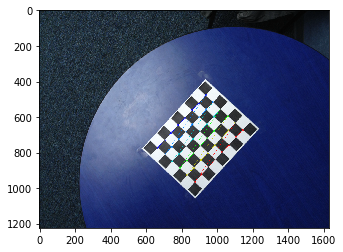

In [2]:
import cv2
nx = 8
ny = 6

# Make a list of calibration images
fname = 'data/calib/c1.jpg'
img = cv2.imread(fname)
plt.imshow(img)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)
    plt.show() 


### Interactive Point Selection

For interactively selecting points in an image by hand (e.g. clicking on the corners of the box) I have provided a bit of code **selectpoints.py** to assist.  Note: this will only work with the **%matplotlib notebook** directive which gives interactive plots

<IPython.core.display.Javascript object>


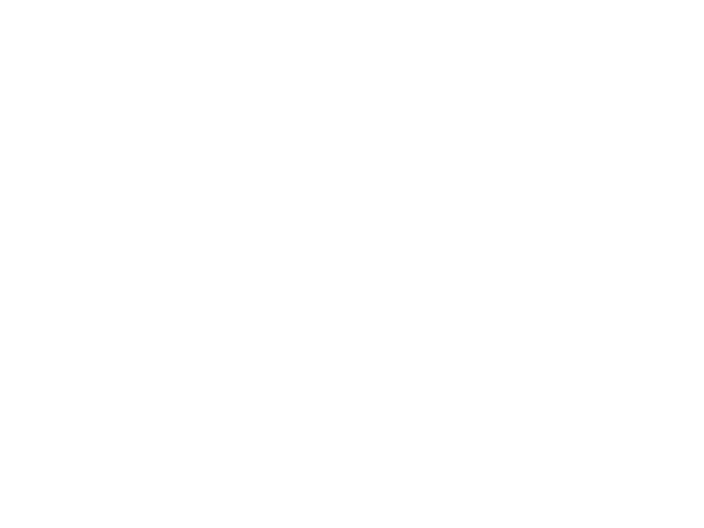

offset= 81.60000000000001


In [5]:
import selectpoints

image = plt.imread('data/challenge/13.jpg')

#display the image in the notebook using a grayscale colormap
# here we keep track of the image axis variable ax, which we
# need to pass along to the select_k_points function
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image)

#selectpoints will show the axis and wait for the specified 
# number of user clicks.
k = 4
spoints = selectpoints.select_k_points(ax,k)

In [14]:
# once you have finished clicking, you can then execute this cell to get
# the point coordinates

# get the x,y coordinates of the selected points
xp = spoints.xs
yp = spoints.ys

print((xp,yp))

([795.780456542969, 1054.0921448546574, 789.1570799195922, 1083.8973396598522], [336.5285164699076, 336.5285164699076, 555.099945041336, 558.4116333530244])
